In [ ]:
'''
3.	Perform clustering analysis on the telecom data set. The data is a mixture of both categorical and numerical data. 
It consists of the number of customers who churn out. 
Derive insights and get possible information on factors that may affect the churn decision. 
Refer to Telco_customer_churn.xlsx dataset.
'''

In [ ]:
pip install feature_engine

In [ ]:
pip install matplotlib==3.1.3

In [4]:
#importing required packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [5]:
#import the data
df=pd.read_excel('/content/Telco_customer_churn.xlsx')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [7]:
df.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [8]:
#checking data types
df.dtypes

Customer ID                           object
Count                                  int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [9]:
#Extracting categorical labels
#categorical_label=[[df.select_dtypes(include=object).columns.to_list()]]
categorical_df=df.select_dtypes(include=object)


In [10]:
categorical_df

,Customer ID,Quarter,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
0,8779-QRDMV,Q3,No,None,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal
1,7495-OOKFY,Q3,Yes,Offer E,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card
2,1658-BYGOY,Q3,No,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal
3,4598-XLKNJ,Q3,Yes,Offer C,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
4,4846-WHAFZ,Q3,Yes,Offer C,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Q3,No,None,Yes,No,No,None,No,No,No,No,No,No,No,No,Two Year,Yes,Bank Withdrawal
7039,6840-RESVB,Q3,Yes,Offer C,Yes,Yes,Yes,Cable,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,One Year,Yes,Mailed Check
7040,2234-XADUH,Q3,Yes,None,Yes,Yes,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card
7041,4801-JZAZL,Q3,Yes,None,No,No,Yes,DSL,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal


In [11]:
#Extracting Numerical labels
Numerical_df=df.select_dtypes(include=['int64','float64'])
#or  Numerical_df=df.select_dtypes(exclude=object)


In [12]:
Numerical_df

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65
1,1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10
2,1,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88
3,1,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07
4,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,72,22.77,0,21.15,1419.40,19.31,0,1639.44,3039.53
7039,1,1,24,36.05,24,84.80,1990.50,48.23,0,865.20,2807.47
7040,1,4,72,29.66,59,103.20,7362.90,45.38,0,2135.52,9453.04
7041,1,1,11,0.00,17,29.60,346.45,27.24,0,0.00,319.21


In [13]:
#Checking for null values
df.isna().sum()

Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [14]:
#Handling duplicates:
duplicate = df.duplicated()  # Returns Boolean Series denoting duplicate rows.
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool


0

In [15]:
from sklearn.preprocessing import LabelEncoder
#creating instance of labelencoder
labelencoder=LabelEncoder()

In [37]:
categorical_df=categorical_df.apply(labelencoder.fit_transform)


In [38]:
categorical_df.dtypes

Customer ID               int64
Quarter                   int64
Referred a Friend         int64
Offer                     int64
Phone Service             int64
Multiple Lines            int64
Internet Service          int64
Internet Type             int64
Online Security           int64
Online Backup             int64
Device Protection Plan    int64
Premium Tech Support      int64
Streaming TV              int64
Streaming Movies          int64
Streaming Music           int64
Unlimited Data            int64
Contract                  int64
Paperless Billing         int64
Payment Method            int64
dtype: object

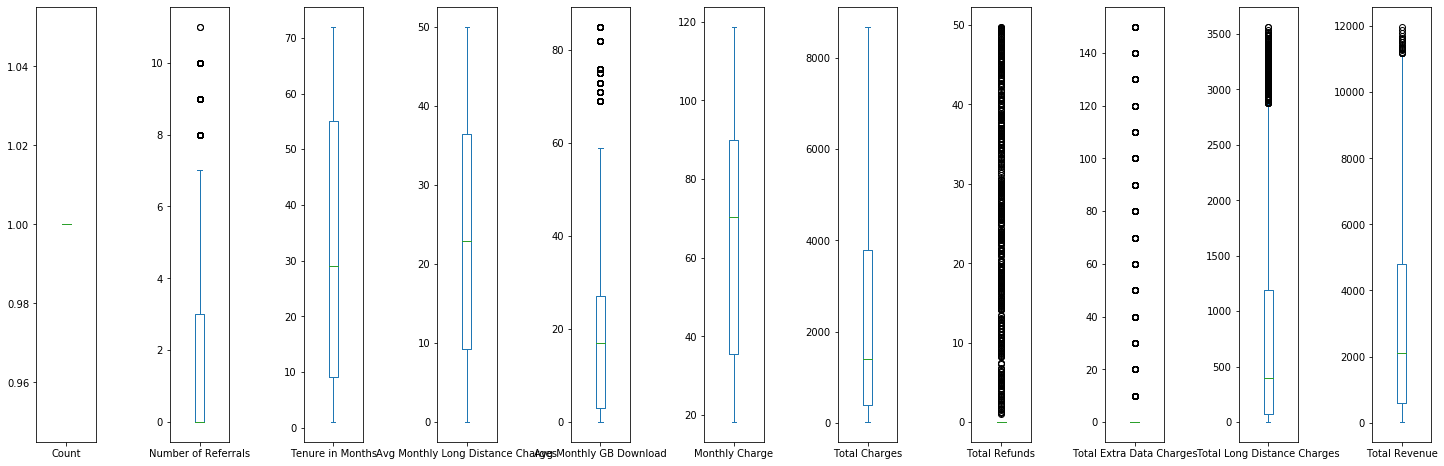

In [17]:
#Outlier analysis for numeric columns
Numerical_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 8)) 
plt.subplots_adjust(wspace = 1.25) 
plt.show()  


In [18]:
Numerical_df.columns

Index(['Count', 'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [19]:
'''
#Outlier treatment
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=0.5,
                          variables=['Number of Referrals','Avg Monthly GB Download', 'Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue'])

Numerical_df = winsor.fit_transform(Numerical_df[['Count', 'Number of Referrals', 'Tenure in Months','Avg Monthly Long Distance Charges', 'Avg Monthly GB Download','Monthly Charge', 'Total Charges', 'Total Long Distance Charges','Total Revenue']])
'''

"\n#Outlier treatment\nwinsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std\n                          tail='both', # cap left, right or both tails \n                          fold=0.5,\n                          variables=['Number of Referrals','Avg Monthly GB Download', 'Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue'])\n\nNumerical_df = winsor.fit_transform(Numerical_df[['Count', 'Number of Referrals', 'Tenure in Months','Avg Monthly Long Distance Charges', 'Avg Monthly GB Download','Monthly Charge', 'Total Charges', 'Total Long Distance Charges','Total Revenue']])\n"

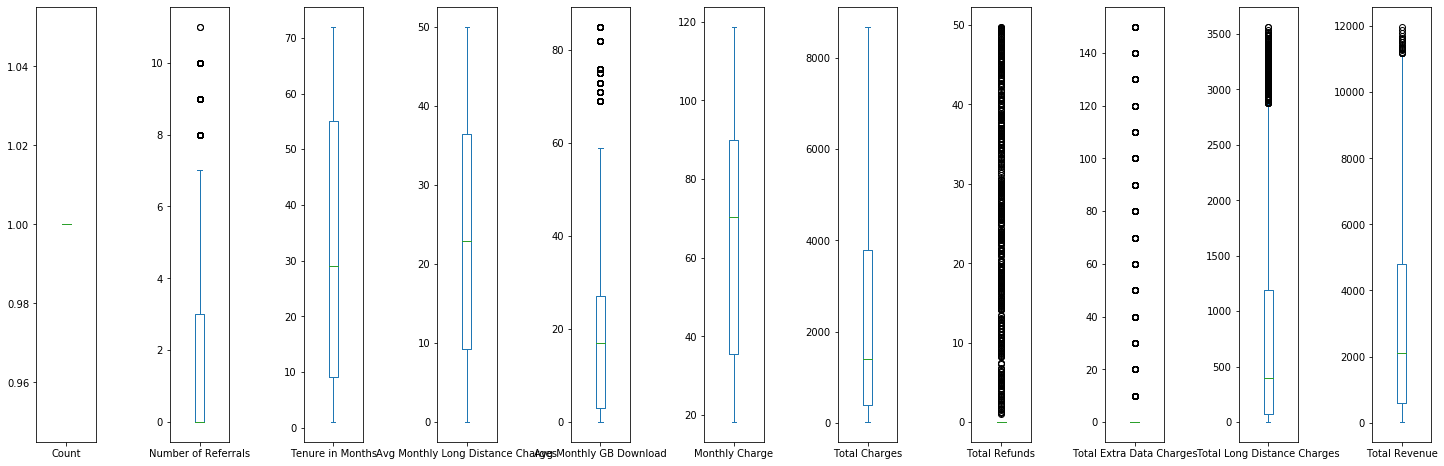

In [20]:
Numerical_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 8)) 
plt.subplots_adjust(wspace = 1.25) 
plt.show()  

In [21]:
winsor = Winsorizer(capping_method='gaussian', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Number of Referrals','Avg Monthly GB Download','Total Long Distance Charges','Total Revenue'])


In [22]:

Numerical_df = winsor.fit_transform(Numerical_df[['Number of Referrals','Avg Monthly GB Download','Total Long Distance Charges','Total Revenue']])

#Numerical_df = winsor.fit_transform(Numerical_df[['Count', 'Number of Referrals', 'Tenure in Months','Avg Monthly Long Distance Charges', 'Avg Monthly GB Download','Monthly Charge', 'Total Charges', 'Total Long Distance Charges','Total Revenue']])

In [23]:
#Zero and near zero variance
Numerical_df.var()

Number of Referrals            5.838186e+00
Avg Monthly GB Download        2.848537e+02
Total Long Distance Charges    4.980200e+05
Total Revenue                  6.369887e+06
dtype: float64

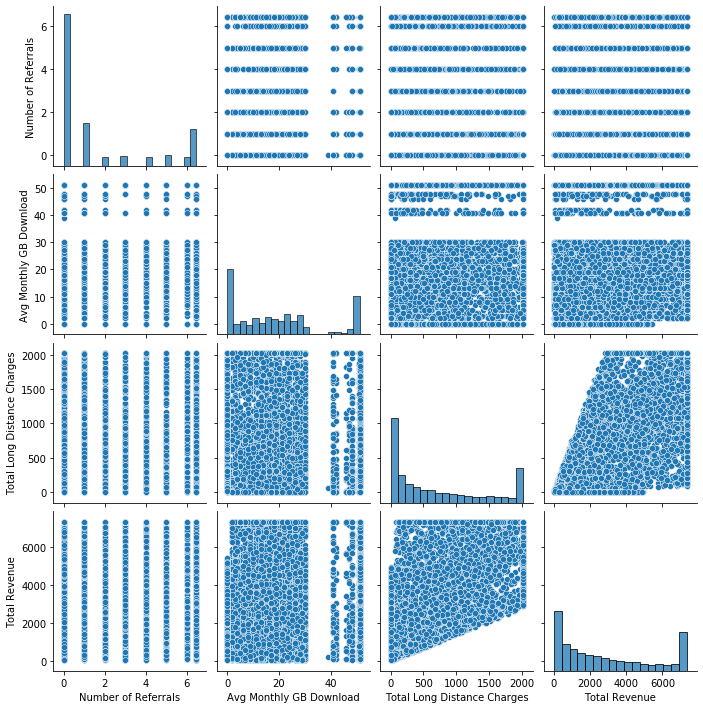

In [24]:
sns.pairplot(Numerical_df)   # Use numerical variables for scatter plots

In [25]:
#Scaling using Normalization:
def norm_func(i):
  x = (i-i.min()) / (i.max()-i.min())
  return(x)

In [26]:
Numerical_df = norm_func(Numerical_df)

In [27]:
Numerical_df.describe()

,Number of Referrals,Avg Monthly GB Download,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.261290,0.370450,0.339737,0.389219
std,0.374416,0.330017,0.349532,0.345237
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.058661,0.034941,0.079919
50%,0.000000,0.332410,0.198831,0.285517
75%,0.464875,0.527946,0.589946,0.653823
max,1.000000,1.000000,1.000000,1.000000


In [41]:
# concatenate categorical and numerical columns
tele_new=pd.concat([categorical_df,Numerical_df],axis=1)
print('Column Name\n')
print(tele_new.columns)
print('Null values\n')
print(tele_new.isna().sum())
print('Describe\n')
print(tele_new.describe())
print('Information\n')
tele_new.info()

Column Name

Index(['Customer ID', 'Quarter', 'Referred a Friend', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Number of Referrals', 'Avg Monthly GB Download',
       'Total Long Distance Charges', 'Total Revenue'],
      dtype='object')
Null values

Customer ID                    0
Quarter                        0
Referred a Friend              0
Offer                          0
Phone Service                  0
Multiple Lines                 0
Internet Service               0
Internet Type                  0
Online Security                0
Online Backup                  0
Device Protection Plan         0
Premium Tech Support           0
Streaming TV                   0
Streaming Movies               0
Stre

In [42]:
'''
CLUSTERING MODEL BUILDING
Hierarchical Clustering - Agglomerative Clustering
'''

'\nCLUSTERING MODEL BUILDING\nHierarchical Clustering - Agglomerative Clustering\n'

In [43]:
# Libraries for creating dendrogram 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering 


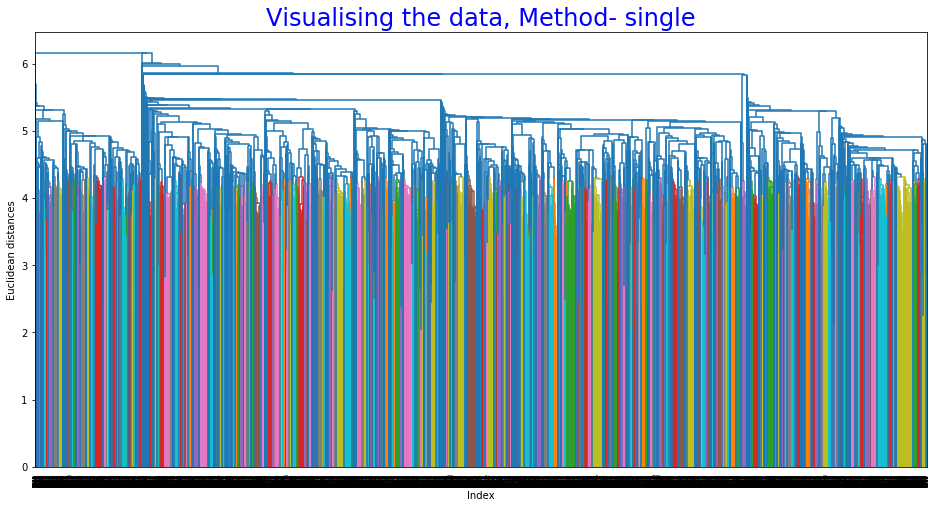

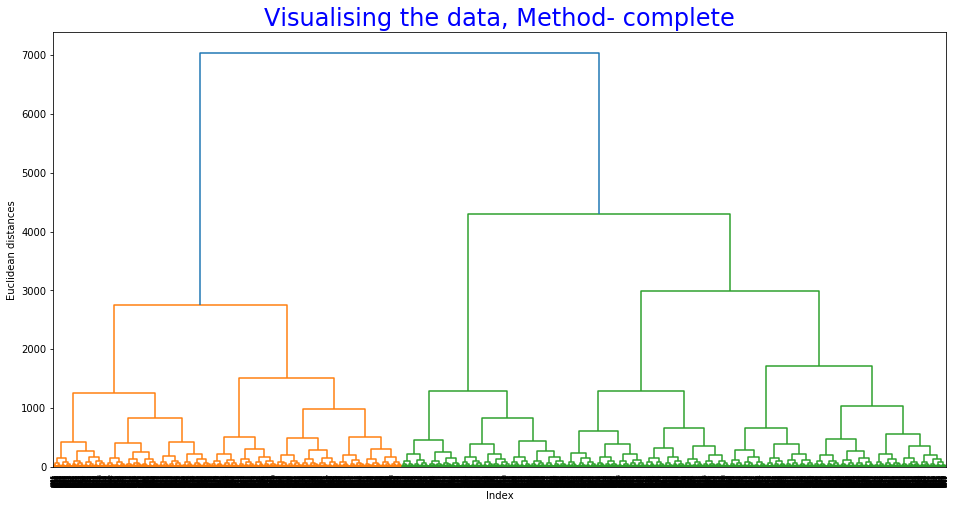

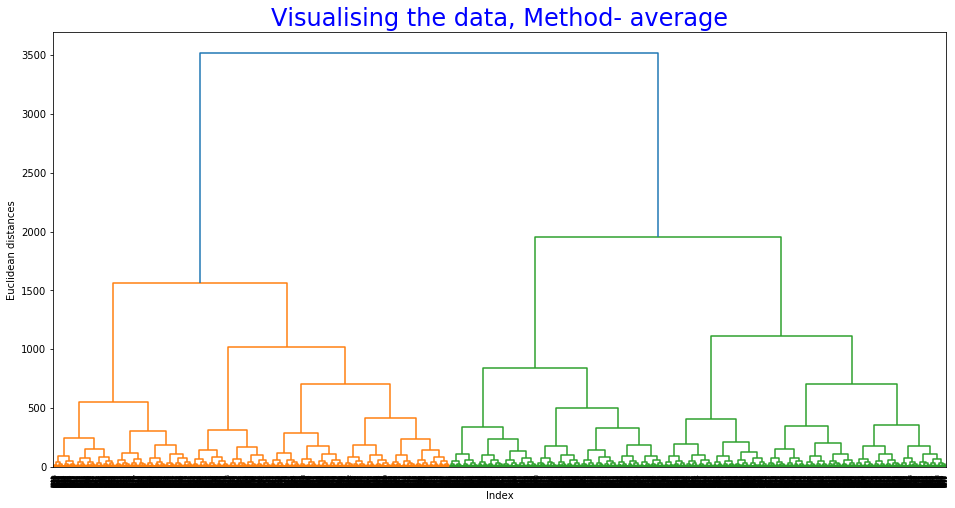

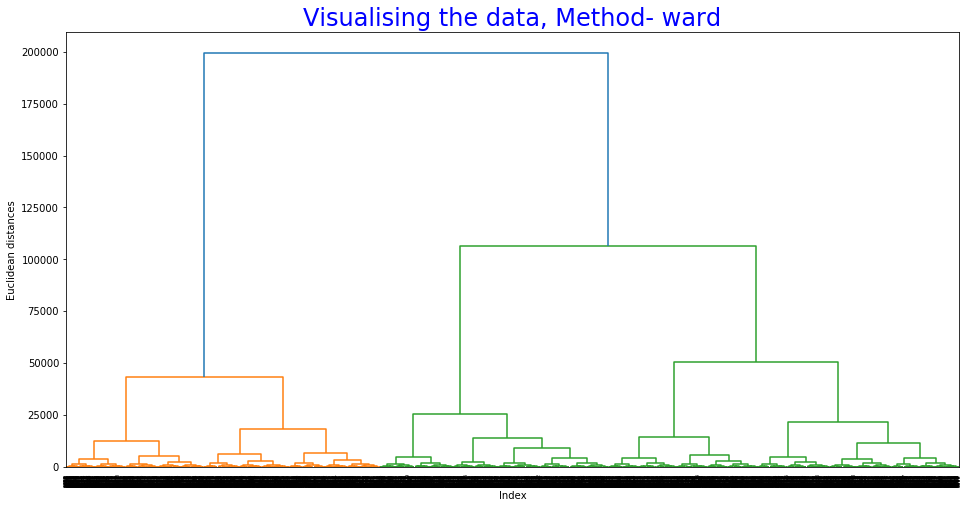

In [46]:
for methods in ['single','complete','average','ward']: 
  plt.figure(figsize =(16, 8)) 
  dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
  plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
  tree_plot=dendrogram(linkage(tele_new, method =methods,optimal_ordering=False))
  plt.xlabel('Index')
  plt.ylabel('Euclidean distances')
  plt.show()

In [47]:
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(tele_new)
        silhouette_score1 = silhouette_score(tele_new, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5764674451046407
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.5984349800921078
For n_clusters = 2 The average silhouette_score with linkage- average : 0.6190003125943911
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3473595673686104

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5754346737189162
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5430011697783338
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5690370355547311
For n_clusters = 3 The average silhouette_score with linkage- single : -0.057115726837186354

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.5312566092220197
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5232033218538127
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5185702483773348
Fo

In [48]:
hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc1 = hc1.fit_predict(tele_new)
y_hc1

array([0, 0, 1, ..., 1, 0, 1])

In [51]:
hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
y_hc2 = hc2.fit_predict(tele_new)
y_hc2

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
hc3 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
y_hc3 = hc3.fit_predict(tele_new)
y_hc3

array([0, 0, 1, ..., 1, 0, 1])

In [53]:
cluster_labels = pd.Series(hc3.labels_)

In [54]:
# Add Cluster labels to orignal Dataset
tele_new['cluster'] = cluster_labels
tele_new.head(20)

,Customer ID,Quarter,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,...,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Number of Referrals,Avg Monthly GB Download,Total Long Distance Charges,Total Revenue,cluster
0,6207,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0.000000,0.156428,0.000000,0.005238,0
1,5305,0,1,5,1,1,1,2,0,1,...,0,1,0,1,1,0.154958,0.332410,0.193561,0.137164,0
2,1129,0,0,4,1,1,1,2,0,0,...,1,1,0,1,0,0.000000,1.000000,0.101010,0.258466,1
3,3208,0,1,3,1,0,1,2,0,1,...,0,1,0,1,0,0.154958,0.234642,0.244676,0.406771,0
4,3419,0,1,3,1,1,1,2,0,0,...,0,1,0,1,0,0.154958,0.273750,0.116003,0.421447,0
5,3079,0,0,3,1,1,1,2,0,0,...,0,0,0,1,0,0.000000,0.351964,0.044532,0.302858,1
6,262,0,1,5,1,0,1,2,0,0,...,0,1,0,1,2,0.154958,0.586606,0.007568,0.008805,1
7,2406,0,1,2,0,0,1,1,0,1,...,0,1,0,1,0,0.929750,0.469285,0.000000,0.354132,1
8,1818,0,0,4,1,1,1,2,0,0,...,0,1,0,1,2,0.000000,0.371517,0.327415,0.244222,1
9,1398,0,0,5,1,0,1,2,1,0,...,0,0,0,0,0,0.000000,0.351964,0.093437,0.090259,1


In [55]:
df2 = tele_new.sort_values(by = 'cluster', ascending = True)
df2

,Customer ID,Quarter,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,...,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Number of Referrals,Avg Monthly GB Download,Total Long Distance Charges,Total Revenue,cluster
0,6207,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0.000000,0.156428,0.000000,0.005238,0
4008,3851,0,0,0,1,1,1,2,0,0,...,0,0,2,1,1,0.000000,0.195535,0.868693,0.961947,0
4005,5151,0,0,5,1,0,1,2,0,0,...,0,1,0,1,0,0.000000,0.410624,0.051649,0.038680,0
4004,3492,0,1,0,1,1,1,2,0,1,...,1,1,0,1,0,1.000000,1.000000,0.719743,0.662306,0
4003,5960,0,1,1,1,0,1,2,1,1,...,1,1,1,1,1,1.000000,0.449731,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,1902,0,1,3,0,0,1,1,0,0,...,0,1,0,0,0,0.619833,0.997230,0.000000,0.091189,1
1509,2566,0,0,5,1,0,1,1,0,0,...,0,1,0,0,1,0.000000,0.410624,0.024061,0.010043,1
1508,1709,0,1,5,0,0,1,1,0,0,...,1,0,0,1,0,0.154958,0.234642,0.000000,0.007850,1
1505,930,0,0,0,1,0,0,3,0,0,...,0,0,0,0,0,0.000000,0.000000,0.005944,0.001462,1


In [56]:
cluster0 = df2.loc[(df2.cluster == 0), :]
cluster0

,Customer ID,Quarter,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,...,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Number of Referrals,Avg Monthly GB Download,Total Long Distance Charges,Total Revenue,cluster
0,6207,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0.000000,0.156428,0.000000,0.005238,0
4008,3851,0,0,0,1,1,1,2,0,0,...,0,0,2,1,1,0.000000,0.195535,0.868693,0.961947,0
4005,5151,0,0,5,1,0,1,2,0,0,...,0,1,0,1,0,0.000000,0.410624,0.051649,0.038680,0
4004,3492,0,1,0,1,1,1,2,0,1,...,1,1,0,1,0,1.000000,1.000000,0.719743,0.662306,0
4003,5960,0,1,1,1,0,1,2,1,1,...,1,1,1,1,1,1.000000,0.449731,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,6496,0,0,5,1,0,1,1,0,0,...,1,1,0,1,1,0.000000,0.117321,0.080956,0.081101,0
2482,3206,0,0,0,1,1,0,3,0,0,...,0,0,1,0,0,0.000000,0.000000,0.071560,0.199318,0
2090,6737,0,0,0,1,0,1,2,0,0,...,0,1,1,1,0,0.000000,0.332410,0.634463,0.527626,0
2088,3665,0,0,0,1,0,1,0,0,1,...,0,0,0,0,2,0.000000,1.000000,0.110594,0.113874,0


In [57]:
cluster1 = df2.loc[(df2.cluster == 1), :]
cluster1

,Customer ID,Quarter,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,...,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Number of Referrals,Avg Monthly GB Download,Total Long Distance Charges,Total Revenue,cluster
5587,715,0,1,1,1,0,0,3,0,0,...,0,0,2,0,1,0.154958,0.000000,0.720550,0.387213,1
7011,247,0,1,3,1,0,1,2,1,0,...,1,1,0,1,0,0.464875,0.801695,0.736939,0.658778,1
5583,2201,0,1,2,1,0,0,3,0,0,...,0,0,2,1,0,1.000000,0.000000,0.929867,0.417869,1
6838,1212,0,1,0,1,0,1,2,0,0,...,0,1,0,0,0,0.929750,0.234642,0.044101,0.322491,1
6865,2885,0,1,0,1,1,1,1,1,1,...,1,0,1,0,0,1.000000,1.000000,0.202754,0.590026,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,1902,0,1,3,0,0,1,1,0,0,...,0,1,0,0,0,0.619833,0.997230,0.000000,0.091189,1
1509,2566,0,0,5,1,0,1,1,0,0,...,0,1,0,0,1,0.000000,0.410624,0.024061,0.010043,1
1508,1709,0,1,5,0,0,1,1,0,0,...,1,0,0,1,0,0.154958,0.234642,0.000000,0.007850,1
1505,930,0,0,0,1,0,0,3,0,0,...,0,0,0,0,0,0.000000,0.000000,0.005944,0.001462,1


In [59]:
cluster0.to_csv('Tele_churn_0.csv', encoding = 'utf-8')
import os
os.getcwd()

'/content'